In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-df/titanic-data-6.csv
/kaggle/input/titanicdataset-traincsv/train.csv


In [61]:
df = pd.read_csv("/kaggle/input/titanic-df/titanic-data-6.csv")

## Аналитика

In [62]:
import matplotlib.pyplot as plt

In [63]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
df.shape

(891, 12)

In [65]:
# Уникальные значения
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [66]:
def show_plots(df, n_cols=2):
    try:
        columns = df.columns
        n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)
        
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 20))
        fig.subplots_adjust(hspace=0.5)
        
        num_col = 0
    
        for j in range(n_cols):
            for i in range(n_rows):
                col = columns[num_col]
                axes[i, j].set_title(col)
                axes[i, j].hist(df[col], bins=len(df[col].value_counts()))
                num_col += 1
    except:
        pass
    plt.show()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Посмотрим распределение по полу

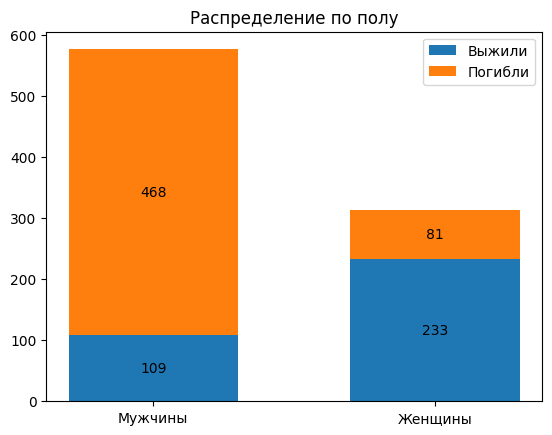

In [68]:
species = ("Мужчины", "Женщины")

male = df[(df["Sex"] == "male")]
female = df[(df["Sex"] == "female")]
male_survived = male[male.Survived == 1]
female_survived = female[female.Survived == 1]

male_survived_count =len(male_survived)
female_survived_count = len(female_survived)

age_counts = {
    "Выжили": [male_survived_count, female_survived_count],
    "Погибли": [len(male) - male_survived_count, len(female) - female_survived_count],
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6  # the width of the bars: can also be len(x) sequence

for survived, sex_count in age_counts.items():
    p = ax.bar(species, sex_count, width, label=survived, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type="center")

ax.set_title("Распределение по полу")
ax.legend()

plt.show()

#### Женщины выживали гораздо чаще мужчин

### Посмотрим распределение по возрасту

In [69]:
# Добавим новую колонку
age_bins = [0, 10, 18, 30, 45, 60, np.inf]
age_labels = ["0-10", "10-18", "19-30", "31-45", "46-60", "60+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

/tmp/ipykernel_30/1546764725.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(["AgeGroup", "Survived"])["Survived"].count().unstack().astype(int)
/tmp/ipykernel_30/1546764725.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(["AgeGroup", "Survived"])["Survived"].count().unstack().astype(int)
/tmp/ipykernel_30/1546764725.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

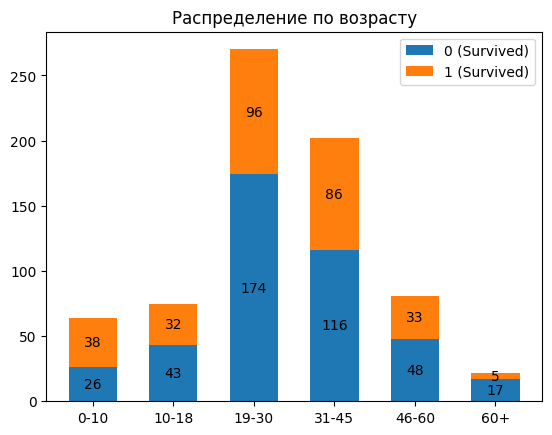

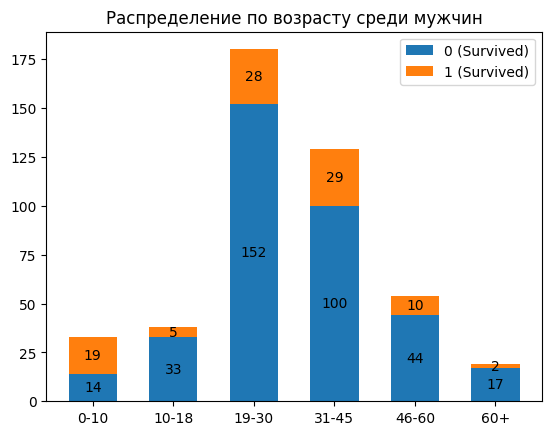

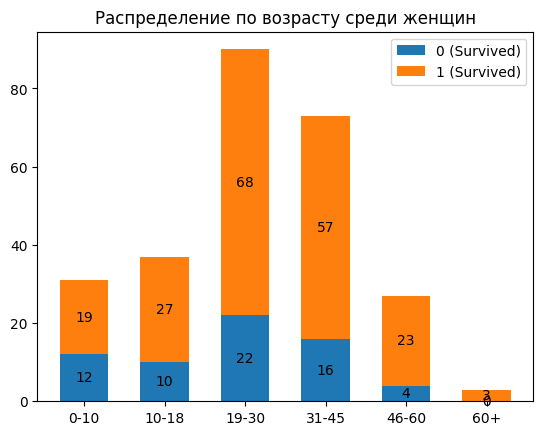

In [70]:
def fill_plot(df, title):
    age_group_counts = df.groupby(["AgeGroup", "Survived"])["Survived"].count().unstack().astype(int)
    fig, ax = plt.subplots()
    bottom = np.zeros(len(age_labels))
    width = 0.6

    for survived, counts in age_group_counts.items():
        p = ax.bar(age_labels, counts, width, label=f"{survived} (Survived)", bottom=bottom)
        bottom += counts

        ax.bar_label(p, label_type="center")
    
    ax.set_title(title)
    ax.legend()

    return ax


# В общем
fill_plot(df, "Распределение по возрасту")

# Мужчины
df_male = df.loc[df['Sex'] == 'male']
fill_plot(df_male, "Распределение по возрасту среди мужчин")

# Женщины
df_female = df.loc[df['Sex'] == 'female']
fill_plot(df_female, title="Распределение по возрасту среди женщин")

plt.show()

Я попросил нейросеть сгенерировать код для того, чтобы посмотреть распределение по возрасту с меткой выжил/не выжил. Но подумал, что этого мало и переписал, чтобы разделить по полам.


#### Интересно, что людей 60+ на корабле было не так много и большинство мужчины.

#### Так же можно заметить что дети до 10 лет имеют высокую выживаемость.


### Создадим новую колонку для родственников

In [71]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [72]:
def show_plot_for_column(df, title):
    group = (
        df.sort_values(title)
        .groupby([title, "Survived"])["Survived"]
        .count()
        .unstack()
    )
    labels = list(map(str, group.index))

    fig, ax = plt.subplots()
    bottom = np.zeros(len(labels))
    width = 0.6

    for survived, count in group.items():
        p = ax.bar(labels, count, width, label=f"{survived} (Survived)", bottom=bottom)
        bottom += count

        ax.bar_label(p, label_type="center")

    ax.set_title("Распределение по классу")
    ax.legend()

    plt.show()

### Поглядим на новую колонку

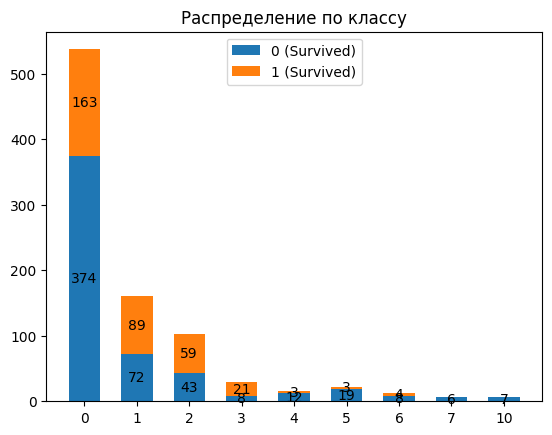

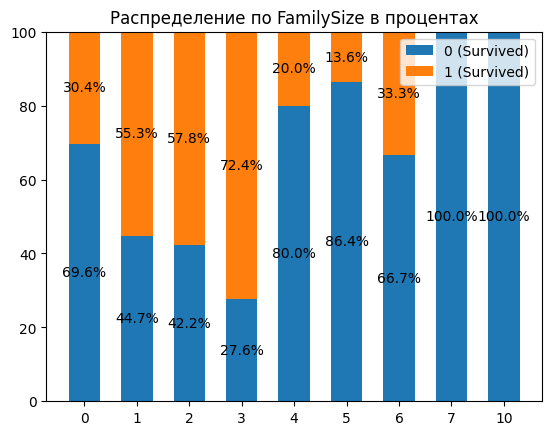

In [73]:
title = "FamilySize"
show_plot_for_column(df, title)


# В процентном соотношении
group = df.sort_values(title).groupby([title, "Survived"])["Survived"].count().unstack()
labels = list(map(str, group.index))
group_sums = group.sum(axis=1)
group_percentages = group.div(group_sums, axis=0) * 100

fig, ax = plt.subplots()
bottom = np.zeros(len(labels))
width = 0.6

for survived, percentages in group_percentages.items():
    p = ax.bar(
        labels, percentages, width, label=f"{survived} (Survived)", bottom=bottom
    )
    bottom += percentages
    ax.bar_label(p, label_type="center", fmt="%.1f%%")

ax.set_title("Распределение по FamilySize в процентах")
ax.legend()

plt.show()

Судя по графику наибольшую выживаемость имеют пассажиры с FamilySize = 3

### Посмотрим по классу

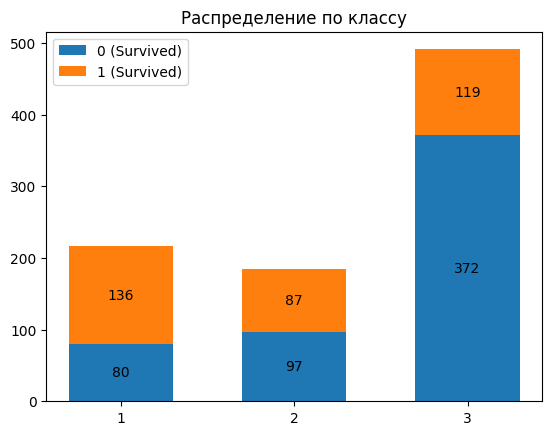

In [74]:
show_plot_for_column(df, "Pclass")

Пассажиров 3-го класса было больше и погибло среди них намного больше

### Разбираемся с пропусками

In [75]:
# Пропуски
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
FamilySize       0
dtype: int64

#### У кого не указан возраст вынесем в отдельную категорию

In [76]:
missing_age = df['Age'].isnull()
df['MissingAge'] = 0
df.loc[missing_age, 'MissingAge'] = 1

In [77]:
# Заполняем пропуски медианой
# Среди женщин и мужчин отдельно

df_male = df.loc[df["Sex"] == "male", "Age"]
df_female = df.loc[df["Sex"] == "female", "Age"]

df.loc[df["Sex"] == "male", "Age"] = df_male.fillna(df_male.median())
df.loc[df["Sex"] == "female", "Age"] = df_female.fillna(df_female.median())

In [78]:
# Снова выдадим AgeGroup всем, чтобы не было пропусков
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

In [79]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
FamilySize       0
MissingAge       0
dtype: int64

### Переводим все значения в числовые типы

In [80]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [81]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,MissingAge
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,2,1,0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,3,1,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,2,0,0
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,3,1,0
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,2,0,0
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,2,0,0
888,889,0,3,413,0,27.0,1,2,675,23.4500,147,2,2,3,1
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,2,0,0


In [82]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,MissingAge
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.441268,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721,2.254770,0.904602,0.198653
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.018747,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231,1.058495,1.613459,0.399210
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000,2.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000,5.000000,10.000000,1.000000


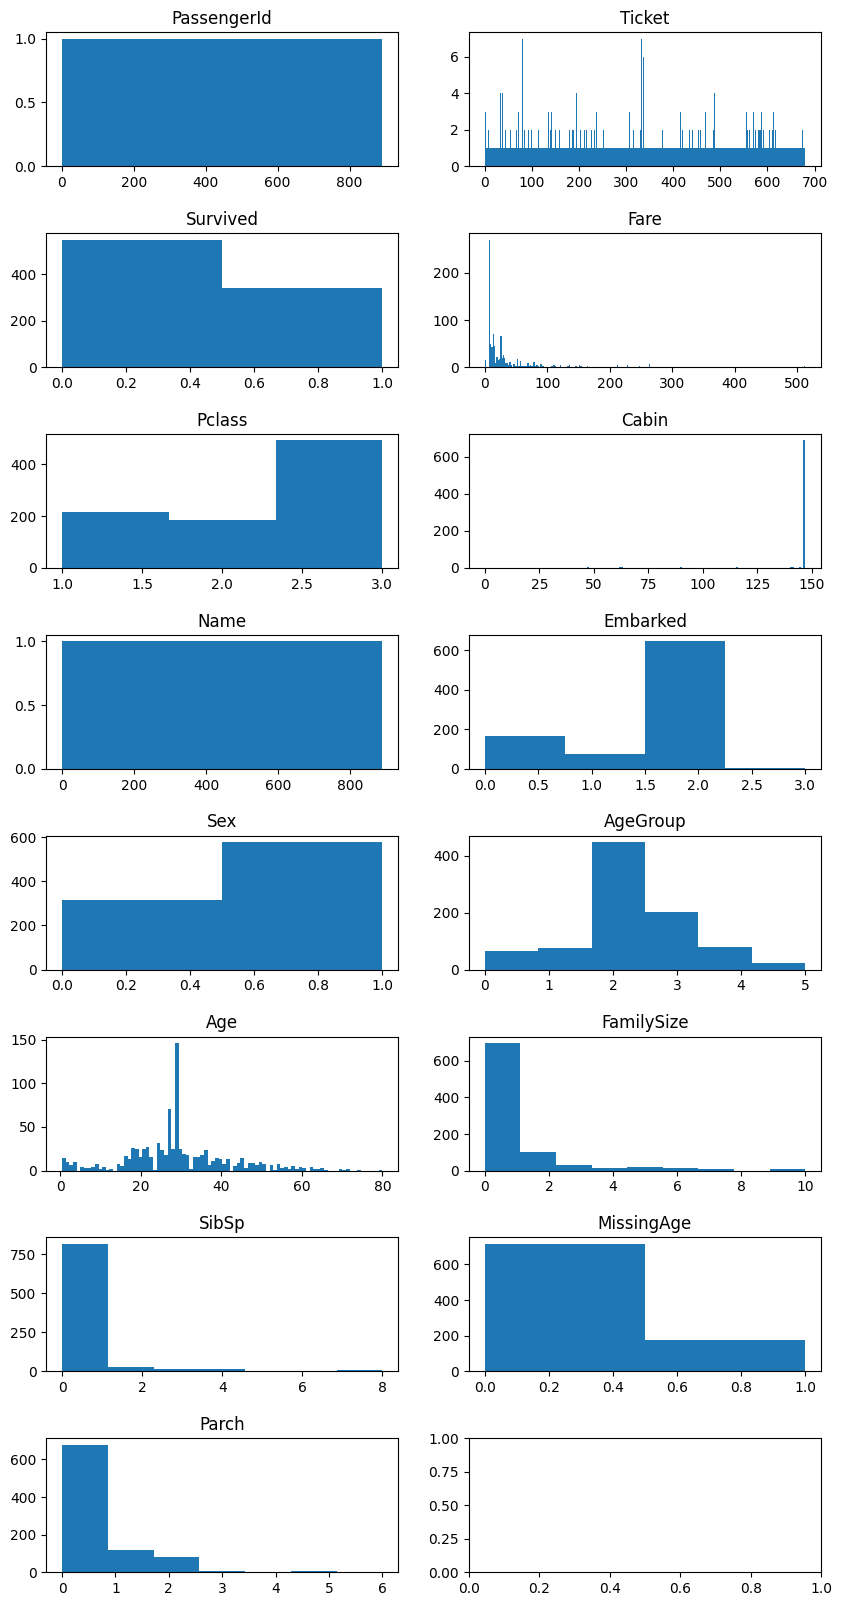

In [83]:
show_plots(df)

#### Я решил выкинуть Name и PassengerId
Хотя появилась гипотеза: вдруг пассажиры с определенными именами выживали чаще?

In [84]:
df = df.drop(columns=["PassengerId", "Name"])

In [85]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
AgeGroup      0
FamilySize    0
MissingAge    0
dtype: int64

### Смотрим кореляцию

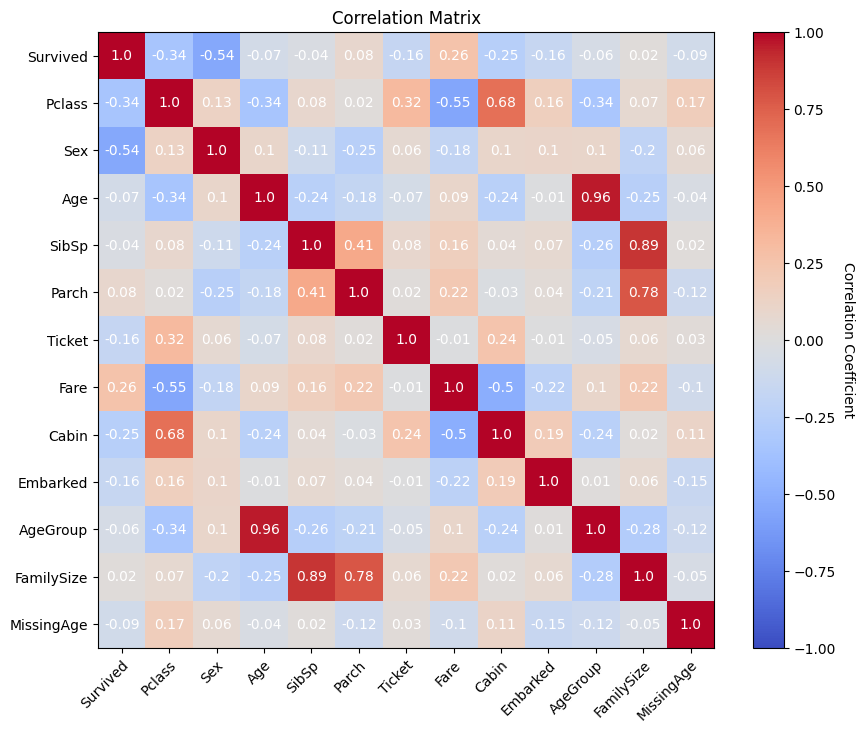

In [86]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation Coefficient', rotation=-90, va="bottom")

# Set labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha="center", va="center", color="w")

ax.set_title("Correlation Matrix")
plt.show()

Колонка AgeGroup очень сильно корелирует надо убрать.


Возможно также выкинуть FamilySize.

In [87]:
df = df.drop(columns=["AgeGroup"])

## Обучение

In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam
from keras.regularizers import l2

In [89]:
X = df.drop(columns=['Survived'])
y = df['Survived']

### Метапараметры

In [90]:
def lr_schedule(epoch, lr):
    return lr * 0.95 ** epoch


learning_rate=0.001

scaler = StandardScaler()
scheduler = LearningRateScheduler(lr_schedule) # Уменьшает скорость обучения с каждой эпохой
optimizer = Adam(learning_rate=learning_rate)

loss = 'binary_crossentropy'
metrics = ['accuracy']

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

epochs=100
batch_size=32
val_split=0.2

callbacks=[early_stopping, scheduler]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Несколько функций, чтобы избежать копипаста

In [92]:
best = []

In [93]:
def split_data():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [94]:
def train_model(model, X_train, Y_train):
    # Долго тупил: почему первая модель тренируется нормально, а другие
    # выдают ошибку и останавливают обучение.
    # Оказалось, что для каждой новой модели нужен новый Adam
    optimizer = Adam(learning_rate)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=val_split,
                        callbacks=callbacks)

In [95]:
def print_metrics(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).astype(int).flatten()
    
    confusion = confusion_matrix(y_test, y_pred)
    
    cm_df = pd.DataFrame(confusion)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision: {precision}, Recall: {recall}')
    print('')
    
    print(f'\nTest loss: {loss}, Test accuracy: {accuracy}')
    print('')

    best.append((model, loss, accuracy, precision, recall))


def show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


def show_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [96]:
def train_and_show_metrics(model):
    history = train_model(model, X_train, y_train)
    
    print_metrics(model, X_test, y_test)
    show_loss(history)
    show_accuracy(history)

## Эксперименты с моделями

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6227 - loss: 0.6708 - val_accuracy: 0.8322 - val_loss: 0.5870 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7275 - loss: 0.5924 - val_accuracy: 0.7832 - val_loss: 0.5409 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7629 - loss: 0.5415 - val_accuracy: 0.7832 - val_loss: 0.5081 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7426 - loss: 0.5286 - val_accuracy: 0.7832 - val_loss: 0.4876 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7684 - loss: 0.4951 - val_accuracy: 0.7832 - val_loss: 0.4739 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7879 - loss: 0.4713 - val_accuracy: 0.7832 - val_loss: 0.4640 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - l

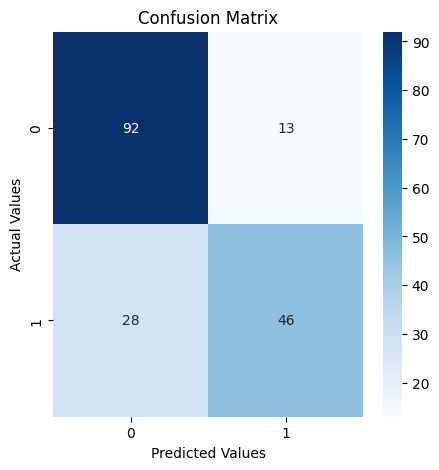

Precision: 0.7796610169491526, Recall: 0.6216216216216216


Test loss: 0.4533909559249878, Test accuracy: 0.7709497213363647



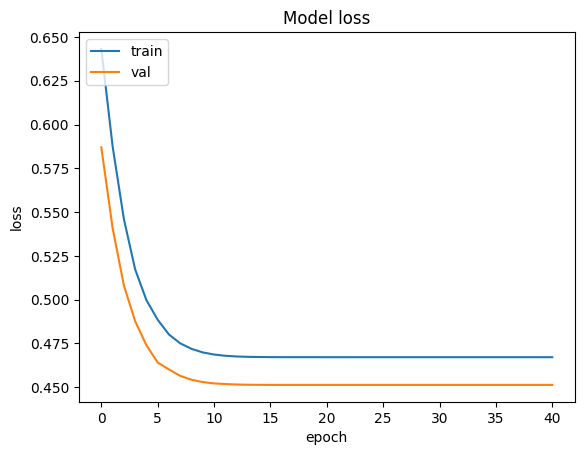

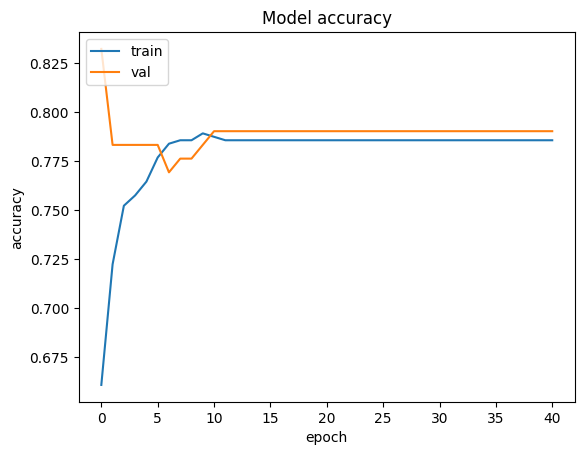

In [97]:
# Модель 1
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6364 - loss: 2.4179 - val_accuracy: 0.7902 - val_loss: 1.9263 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7640 - loss: 1.8123 - val_accuracy: 0.8112 - val_loss: 1.4354 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7796 - loss: 1.3942 - val_accuracy: 0.8322 - val_loss: 1.1602 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8027 - loss: 1.2037 - val_accuracy: 0.8531 - val_loss: 1.0244 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8136 - loss: 1.0269 - val_accuracy: 0.8322 - val_loss: 0.9406 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8208 - loss: 0.9338 - val_accuracy: 0.8322 - val_loss: 0.8907 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8121 - l

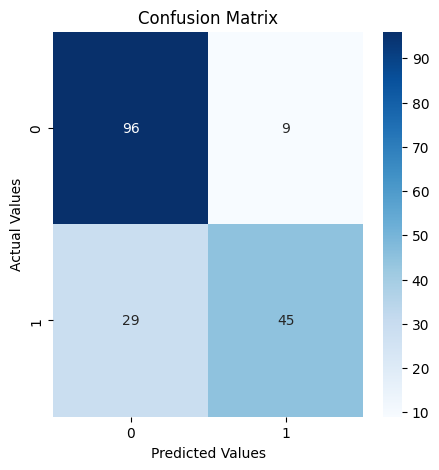

Precision: 0.8333333333333334, Recall: 0.6081081081081081


Test loss: 1.926997184753418, Test accuracy: 0.7877094745635986



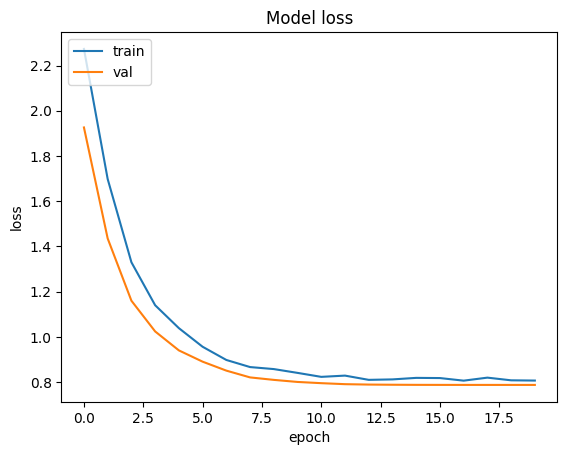

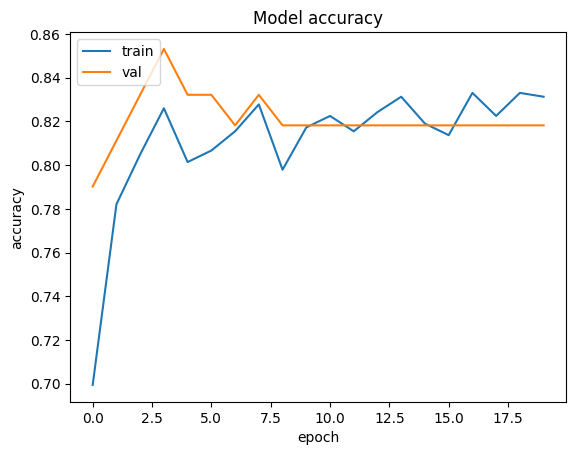

In [98]:
# Модель 2
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6349 - loss: 2.4312 - val_accuracy: 0.7133 - val_loss: 1.9769 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6259 - loss: 1.8938 - val_accuracy: 0.8042 - val_loss: 1.5258 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7200 - loss: 1.5205 - val_accuracy: 0.8112 - val_loss: 1.2432 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7547 - loss: 1.2907 - val_accuracy: 0.8182 - val_loss: 1.0725 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7725 - loss: 1.1047 - val_accuracy: 0.8252 - val_loss: 0.9704 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7715 - loss: 1.0116 - val_accuracy: 0.8182 - val_loss: 0.9081 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7720 - l

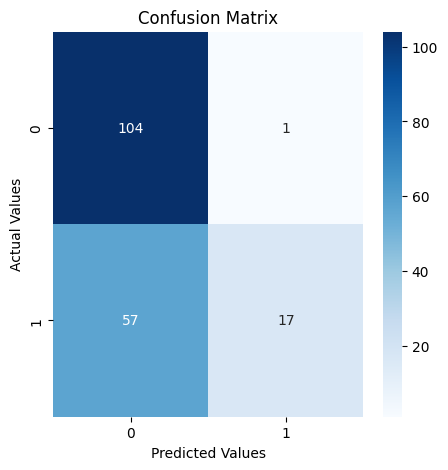

Precision: 0.9444444444444444, Recall: 0.22972972972972974


Test loss: 1.9917418956756592, Test accuracy: 0.6759776473045349



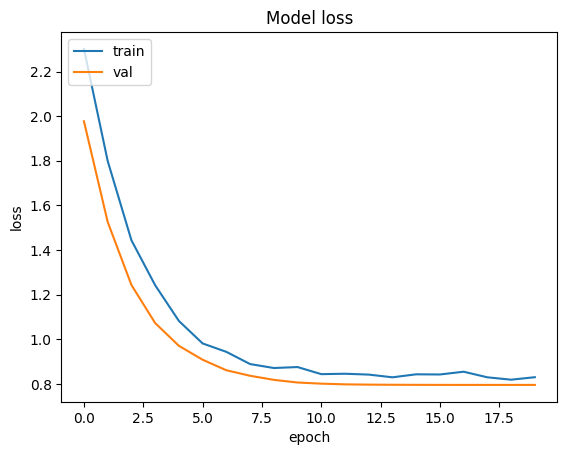

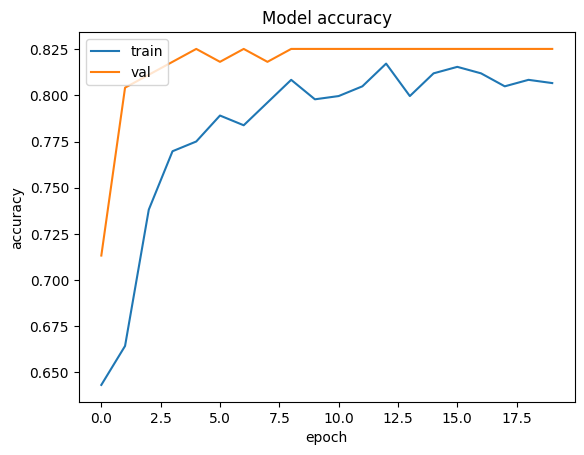

In [99]:
# Модель 3
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5872 - loss: 3.8792 - val_accuracy: 0.6993 - val_loss: 3.2596 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6938 - loss: 3.0986 - val_accuracy: 0.7622 - val_loss: 2.6142 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7527 - loss: 2.5274 - val_accuracy: 0.8112 - val_loss: 2.1466 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7496 - loss: 2.1317 - val_accuracy: 0.8182 - val_loss: 1.8339 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8210 - loss: 1.8227 - val_accuracy: 0.8322 - val_loss: 1.6390 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8040 - loss: 1.6680 - val_accuracy: 0.8322 - val_loss: 1.5144 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7699 - l

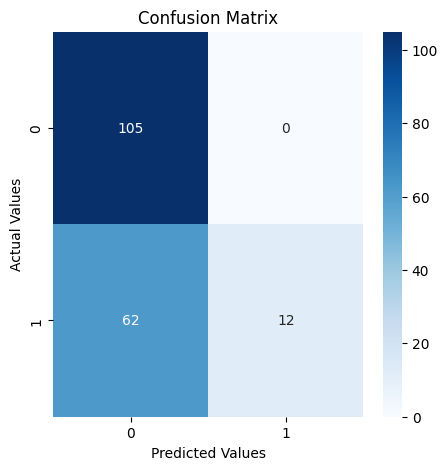

Precision: 1.0, Recall: 0.16216216216216217


Test loss: 3.277071952819824, Test accuracy: 0.6536312699317932



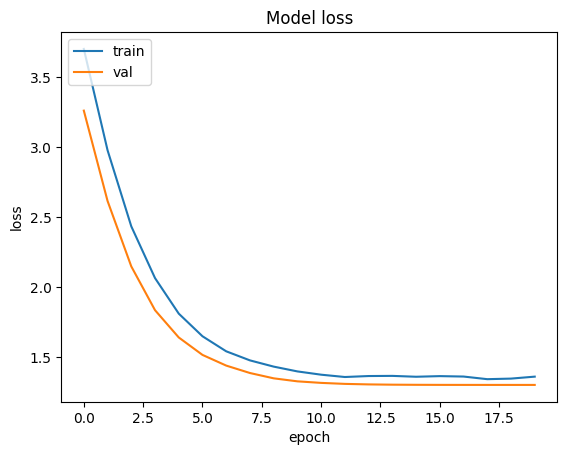

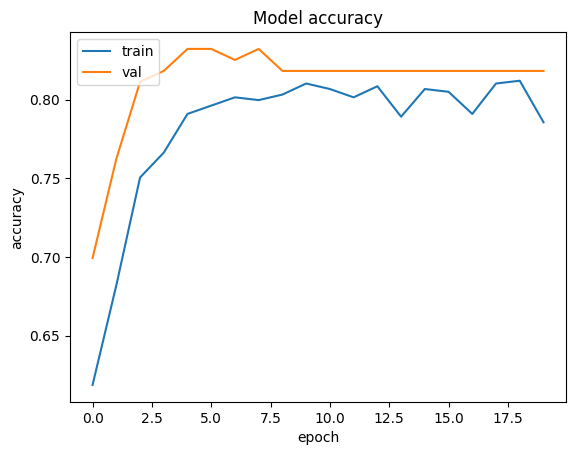

In [100]:
# Модель 4
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3682 - loss: 3.9399 - val_accuracy: 0.6713 - val_loss: 3.3430 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5802 - loss: 3.1941 - val_accuracy: 0.6503 - val_loss: 2.7383 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6297 - loss: 2.6278 - val_accuracy: 0.6503 - val_loss: 2.2913 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6702 - loss: 2.2127 - val_accuracy: 0.6503 - val_loss: 1.9776 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6129 - loss: 1.9294 - val_accuracy: 0.6503 - val_loss: 1.7631 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6142 - loss: 1.7353 - val_accuracy: 0.6503 - val_loss: 1.6194 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6083 - l

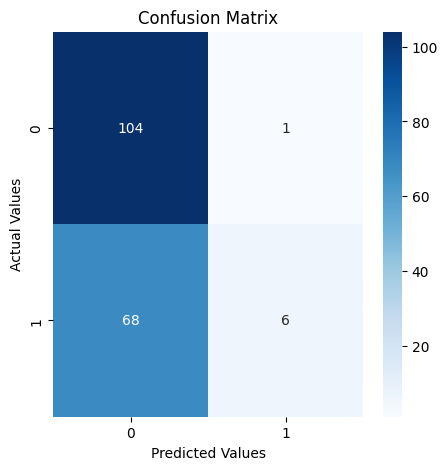

Precision: 0.8571428571428571, Recall: 0.08108108108108109


Test loss: 3.3457648754119873, Test accuracy: 0.6145251393318176



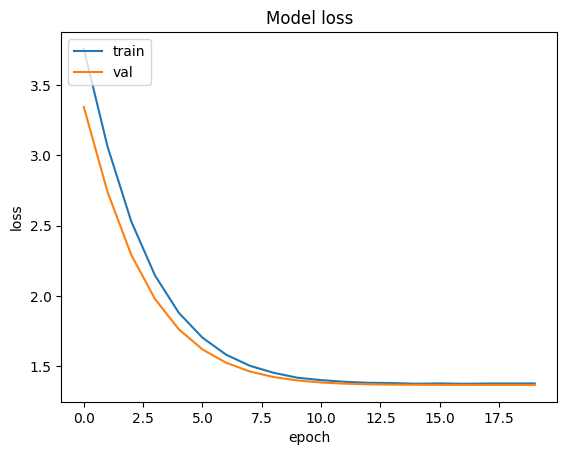

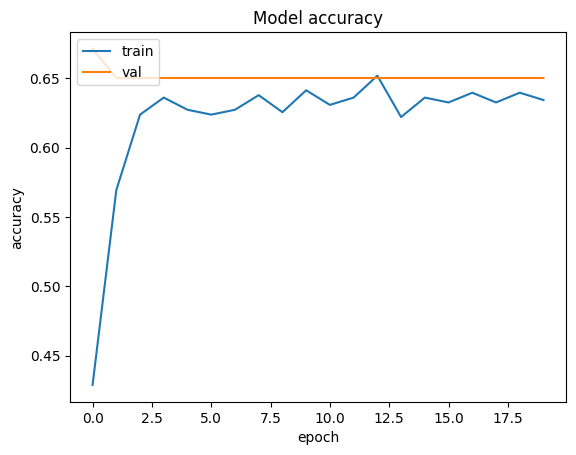

In [101]:
# Модель 5
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5986 - loss: 2.2817 - val_accuracy: 0.6503 - val_loss: 2.0012 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6119 - loss: 1.9682 - val_accuracy: 0.6503 - val_loss: 1.7138 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6401 - loss: 1.6921 - val_accuracy: 0.7413 - val_loss: 1.5052 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6842 - loss: 1.5368 - val_accuracy: 0.8182 - val_loss: 1.3695 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7406 - loss: 1.4146 - val_accuracy: 0.8252 - val_loss: 1.2651 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7824 - loss: 1.2996 - val_accuracy: 0.8322 - val_loss: 1.1908 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7820 - l

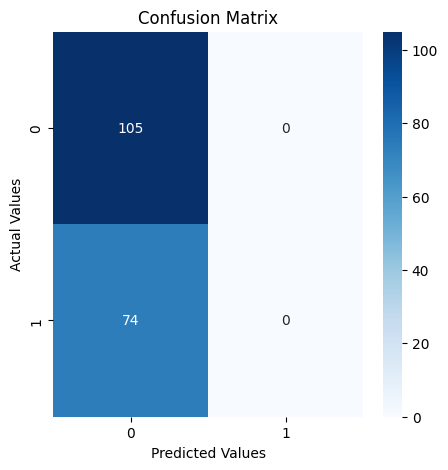

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0, Recall: 0.0


Test loss: 2.0220603942871094, Test accuracy: 0.5865921974182129



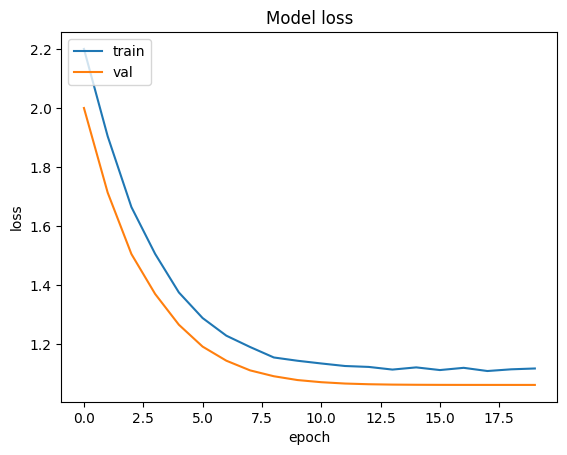

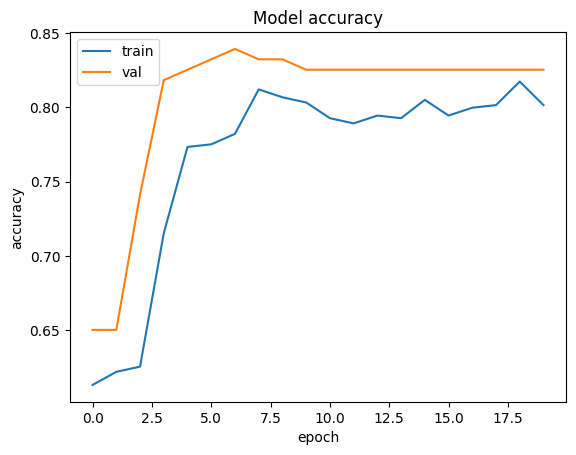

In [102]:
# Модель 6
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5845 - loss: 2.2635 - val_accuracy: 0.7273 - val_loss: 2.0168 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7191 - loss: 1.9526 - val_accuracy: 0.7622 - val_loss: 1.7326 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7346 - loss: 1.6973 - val_accuracy: 0.7832 - val_loss: 1.4997 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 1.5219 - val_accuracy: 0.7972 - val_loss: 1.3352 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7797 - loss: 1.3508 - val_accuracy: 0.8112 - val_loss: 1.2303 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 1.2592 - val_accuracy: 0.8112 - val_loss: 1.1628 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7999 - l

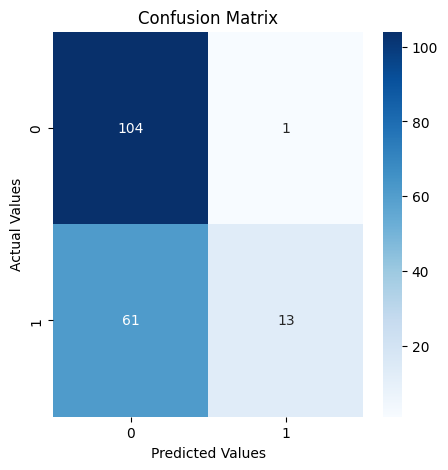

Precision: 0.9285714285714286, Recall: 0.17567567567567569


Test loss: 2.0278286933898926, Test accuracy: 0.6536312699317932



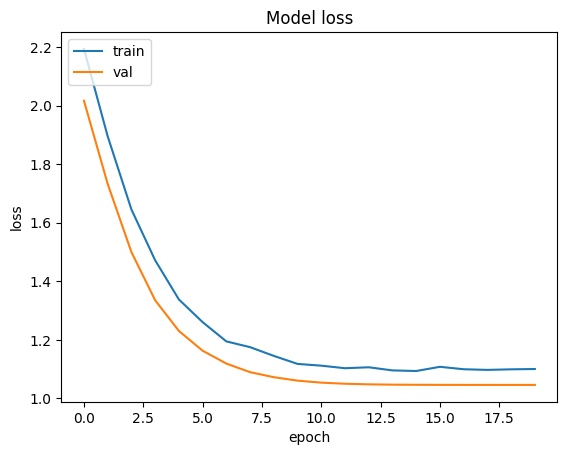

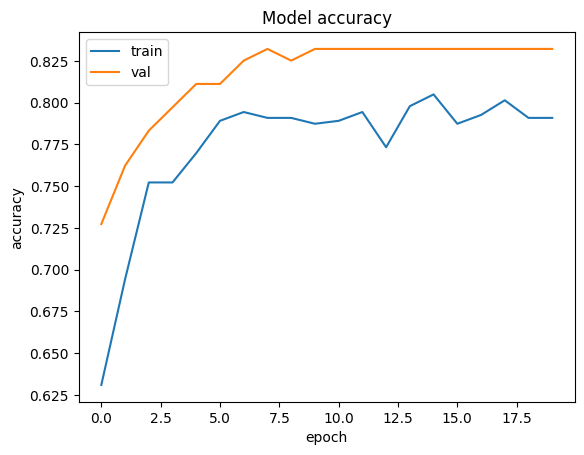

In [103]:
# Модель 7
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6334 - loss: 1.4637 - val_accuracy: 0.7343 - val_loss: 1.3164 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7706 - loss: 1.2890 - val_accuracy: 0.7762 - val_loss: 1.1836 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7757 - loss: 1.1830 - val_accuracy: 0.7972 - val_loss: 1.0870 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7696 - loss: 1.0873 - val_accuracy: 0.7902 - val_loss: 1.0113 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7996 - loss: 1.0034 - val_accuracy: 0.8042 - val_loss: 0.9607 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7923 - loss: 0.9826 - val_accuracy: 0.8252 - val_loss: 0.9253 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - l

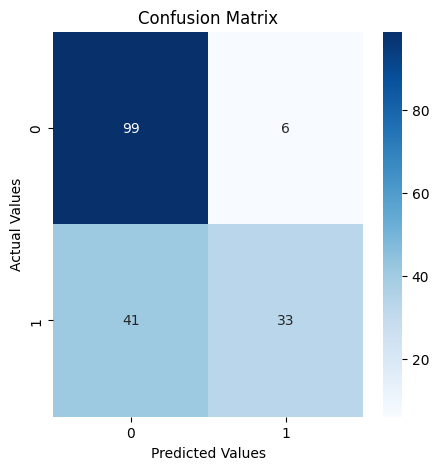

Precision: 0.8461538461538461, Recall: 0.44594594594594594


Test loss: 1.3282064199447632, Test accuracy: 0.7374301552772522



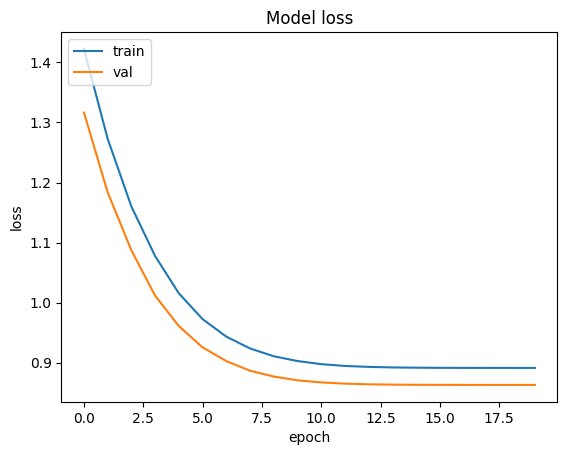

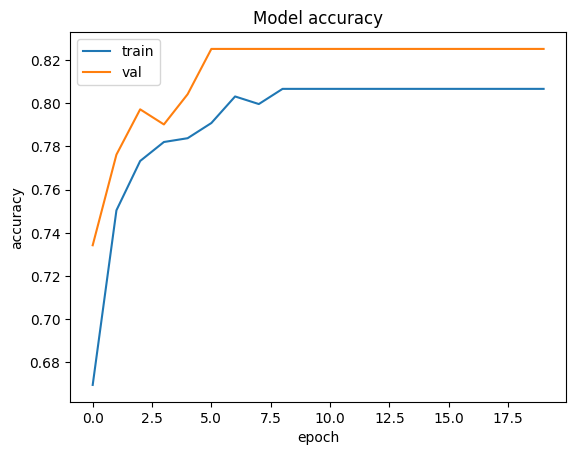

In [104]:
# Модель 8
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6581 - loss: 2.0494 - val_accuracy: 0.7762 - val_loss: 1.7694 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7474 - loss: 1.7233 - val_accuracy: 0.8112 - val_loss: 1.5052 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7697 - loss: 1.4863 - val_accuracy: 0.7972 - val_loss: 1.3137 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 1.3031 - val_accuracy: 0.8042 - val_loss: 1.1810 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8007 - loss: 1.1994 - val_accuracy: 0.8182 - val_loss: 1.0892 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8060 - loss: 1.1140 - val_accuracy: 0.8182 - val_loss: 1.0304 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8278 - l

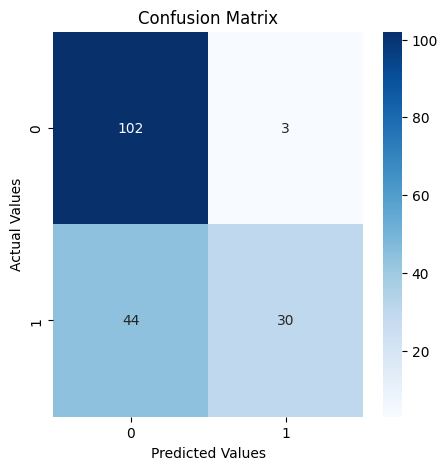

Precision: 0.9090909090909091, Recall: 0.40540540540540543


Test loss: 1.7951946258544922, Test accuracy: 0.7374301552772522



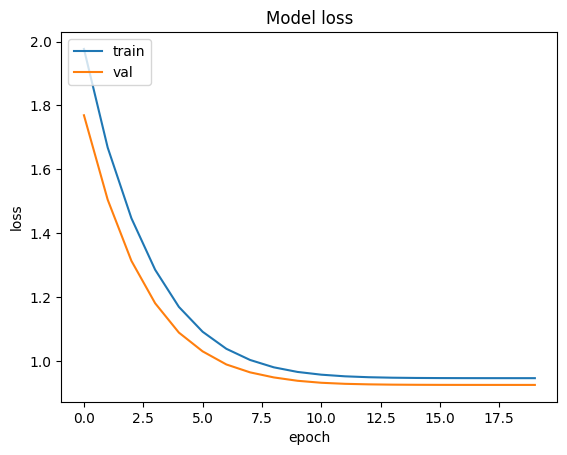

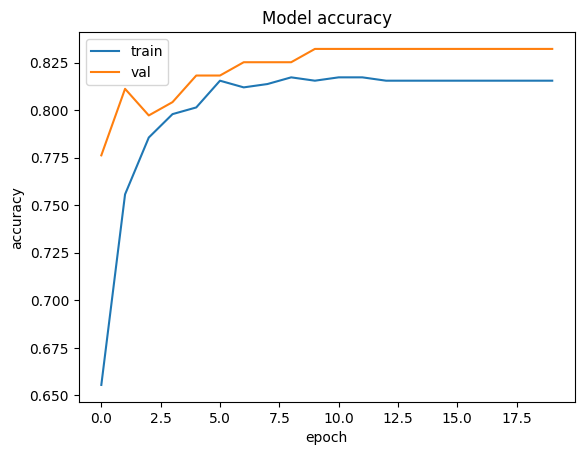

In [105]:
# Модель 9
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5221 - loss: 0.8843 - val_accuracy: 0.7902 - val_loss: 0.7766 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7435 - loss: 0.7707 - val_accuracy: 0.8042 - val_loss: 0.6590 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7798 - loss: 0.6519 - val_accuracy: 0.8182 - val_loss: 0.5782 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8068 - loss: 0.6083 - val_accuracy: 0.8322 - val_loss: 0.5419 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8196 - loss: 0.5519 - val_accuracy: 0.8322 - val_loss: 0.5315 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8225 - loss: 0.5337 - val_accuracy: 0.8392 - val_loss: 0.5218 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8280 - l

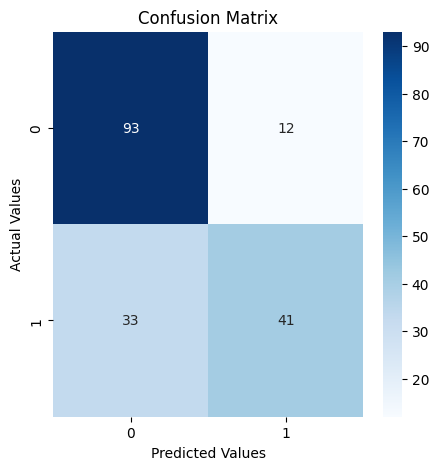

Precision: 0.7735849056603774, Recall: 0.5540540540540541


Test loss: 0.7900105118751526, Test accuracy: 0.748603343963623



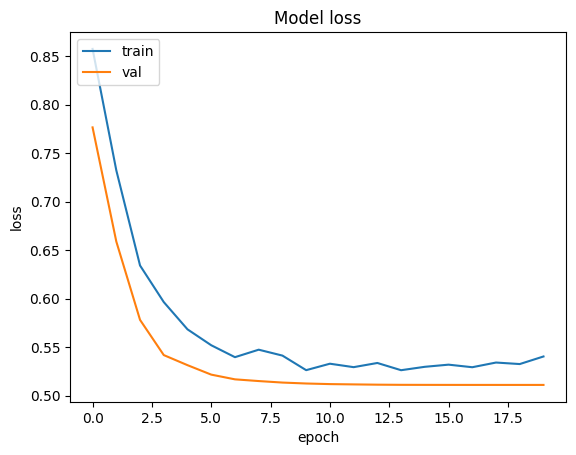

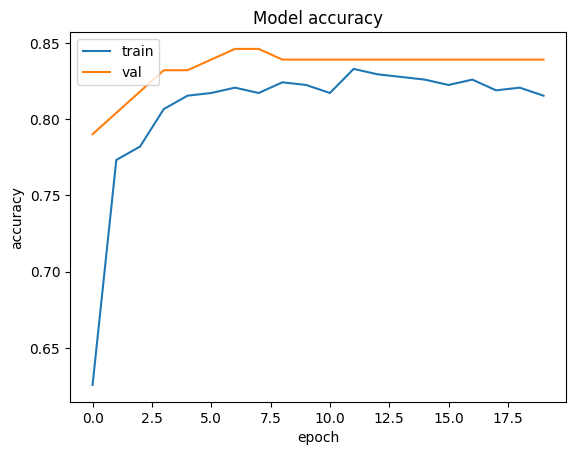

In [106]:
# Модель 10
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4032 - loss: 0.7894 - val_accuracy: 0.7343 - val_loss: 0.6249 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7369 - loss: 0.6059 - val_accuracy: 0.7902 - val_loss: 0.5172 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.5183 - val_accuracy: 0.8112 - val_loss: 0.4644 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7734 - loss: 0.4935 - val_accuracy: 0.8112 - val_loss: 0.4412 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7833 - loss: 0.4685 - val_accuracy: 0.8182 - val_loss: 0.4266 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7877 - loss: 0.4586 - val_accuracy: 0.8322 - val_loss: 0.4193 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - l

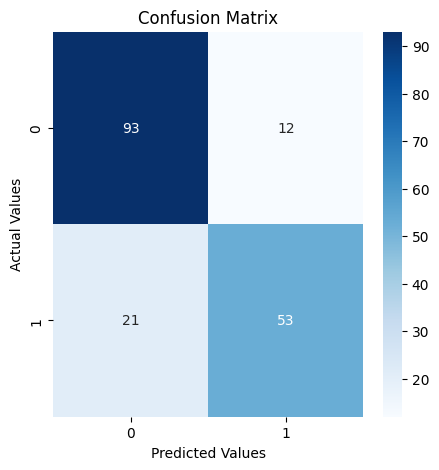

Precision: 0.8153846153846154, Recall: 0.7162162162162162


Test loss: 0.4129100739955902, Test accuracy: 0.8156424760818481



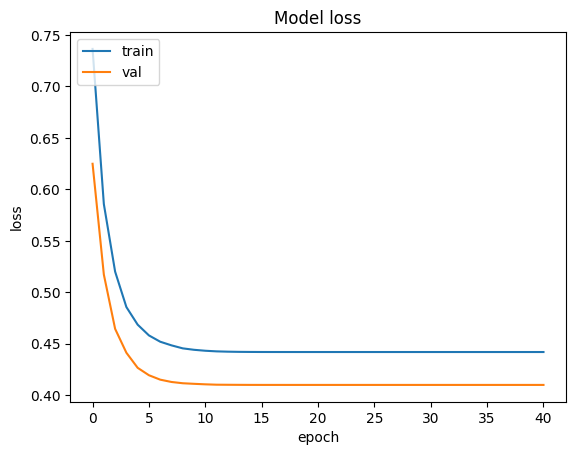

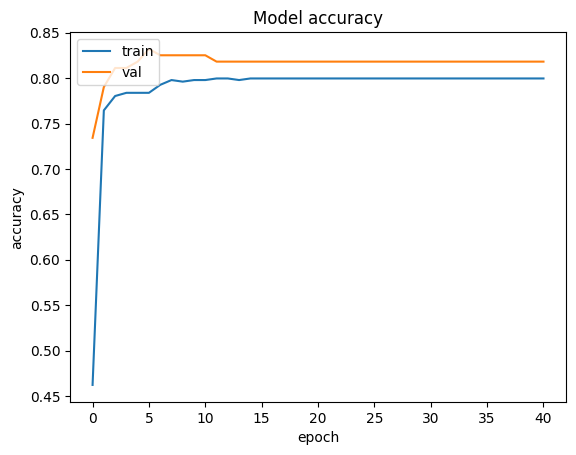

In [107]:
# Модель 11
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5320 - loss: 0.8947 - val_accuracy: 0.7902 - val_loss: 0.8025 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7282 - loss: 0.7917 - val_accuracy: 0.8322 - val_loss: 0.6834 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7855 - loss: 0.6980 - val_accuracy: 0.8392 - val_loss: 0.5888 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7665 - loss: 0.6355 - val_accuracy: 0.8462 - val_loss: 0.5517 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.6555 - val_accuracy: 0.8322 - val_loss: 0.5419 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7956 - loss: 0.5978 - val_accuracy: 0.8462 - val_loss: 0.5332 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7979 - l

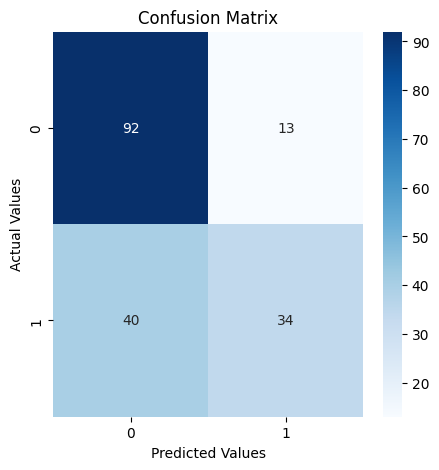

Precision: 0.723404255319149, Recall: 0.4594594594594595


Test loss: 0.8172020316123962, Test accuracy: 0.7039105892181396



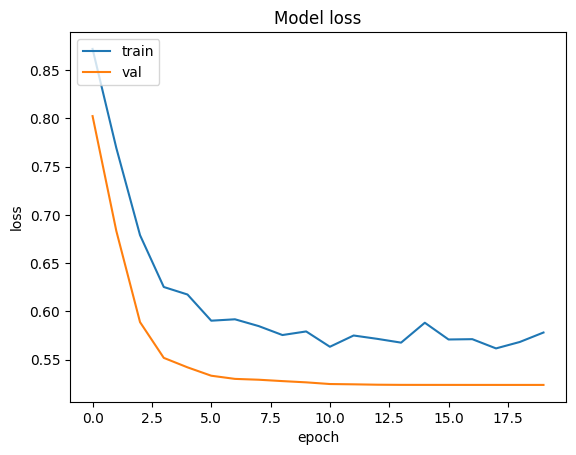

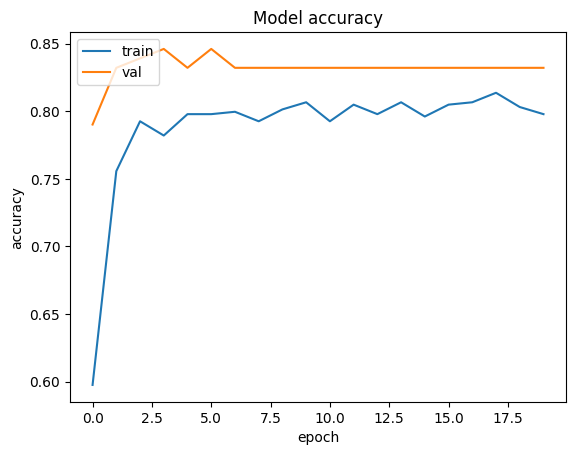

In [108]:
# Модель 12
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7063 - loss: 0.6029 - val_accuracy: 0.8042 - val_loss: 0.4368 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7727 - loss: 0.4589 - val_accuracy: 0.8252 - val_loss: 0.3993 - learning_rate: 9.5000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7963 - loss: 0.4510 - val_accuracy: 0.8182 - val_loss: 0.3957 - learning_rate: 8.5738e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.4199 - val_accuracy: 0.8322 - val_loss: 0.3912 - learning_rate: 7.3509e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.4159 - val_accuracy: 0.8252 - val_loss: 0.3916 - learning_rate: 5.9874e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8357 - loss: 0.3854 - val_accuracy: 0.8252 - val_loss: 0.3873 - learning_rate: 4.6329e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8621 - l

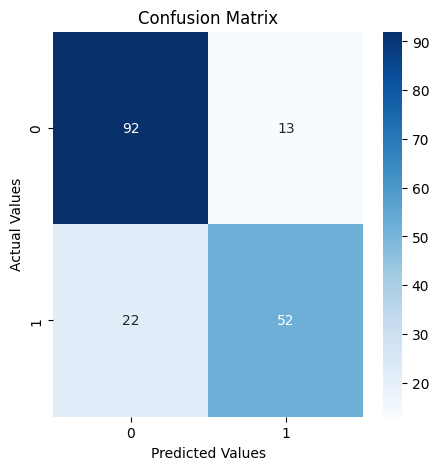

Precision: 0.8, Recall: 0.7027027027027027


Test loss: 0.42205891013145447, Test accuracy: 0.8044692873954773



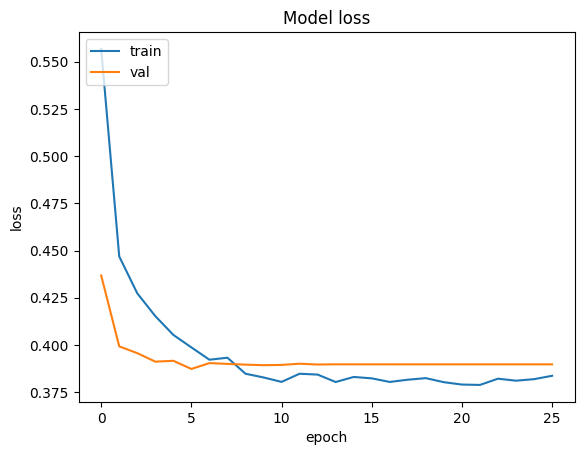

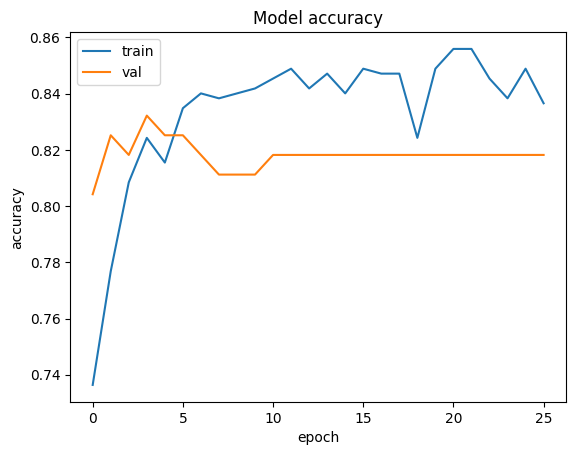

In [109]:
# Модель 13
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

train_and_show_metrics(model)

Я эксперементировал с количеством слоев, добавлял Dropout и менял у него значения, добавлял убирал регуляризацию.

Увеличил количество эпох и добавил раннюю остановку

Скорость обучения оставил стандартную, никак с ней не эксперементировал

In [110]:
# Что получилось
for (i, (model, _loss, accuracy, precision, recall)) in enumerate(best):
    # Лосу добавил _ потому что такая глобальная переменная уже есть
    _loss, accuracy, precision, recall = map(lambda x: round(x, 2), (_loss, accuracy, precision, recall))
    print(f"Model: {i + 1}\t Loss: {_loss:5.2f}\t Accuracy: {accuracy:5.2f}\t Precision: {precision:5.2f}\t Recall: {recall:5.2f}")

Model: 1	 Loss:  0.45	 Accuracy:  0.77	 Precision:  0.78	 Recall:  0.62
Model: 2	 Loss:  1.93	 Accuracy:  0.79	 Precision:  0.83	 Recall:  0.61
Model: 3	 Loss:  1.99	 Accuracy:  0.68	 Precision:  0.94	 Recall:  0.23
Model: 4	 Loss:  3.28	 Accuracy:  0.65	 Precision:  1.00	 Recall:  0.16
Model: 5	 Loss:  3.35	 Accuracy:  0.61	 Precision:  0.86	 Recall:  0.08
Model: 6	 Loss:  2.02	 Accuracy:  0.59	 Precision:  0.00	 Recall:  0.00
Model: 7	 Loss:  2.03	 Accuracy:  0.65	 Precision:  0.93	 Recall:  0.18
Model: 8	 Loss:  1.33	 Accuracy:  0.74	 Precision:  0.85	 Recall:  0.45
Model: 9	 Loss:  1.80	 Accuracy:  0.74	 Precision:  0.91	 Recall:  0.41
Model: 10	 Loss:  0.79	 Accuracy:  0.75	 Precision:  0.77	 Recall:  0.55
Model: 11	 Loss:  0.41	 Accuracy:  0.82	 Precision:  0.82	 Recall:  0.72
Model: 12	 Loss:  0.82	 Accuracy:  0.70	 Precision:  0.72	 Recall:  0.46
Model: 13	 Loss:  0.42	 Accuracy:  0.80	 Precision:  0.80	 Recall:  0.70


### Краткие выводы

Судя по всему модели с большим количеством нейронов и Dropout-ов показывают худшие результаты.

## Кросс валидация

#### Возьму модель №13

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6091 - loss: 0.6484 - val_accuracy: 0.8025 - val_loss: 0.5033 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8042 - loss: 0.4587 - val_accuracy: 0.8067 - val_loss: 0.4662 - learning_rate: 9.5000e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7929 - loss: 0.4355 - val_accuracy: 0.8067 - val_loss: 0.4613 - learning_rate: 8.5738e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8167 - loss: 0.4129 - val_accuracy: 0.8025 - val_loss: 0.4521 - learning_rate: 7.3509e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8020 - loss: 0.4133 - val_accuracy: 0.8067 - val_loss: 0.4544 - learning_rate: 5.9874e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8465 - loss: 0.3809 - val_accuracy: 0.8067 - val_loss: 0.4502 - learning_rate: 4.6329e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8469 - l

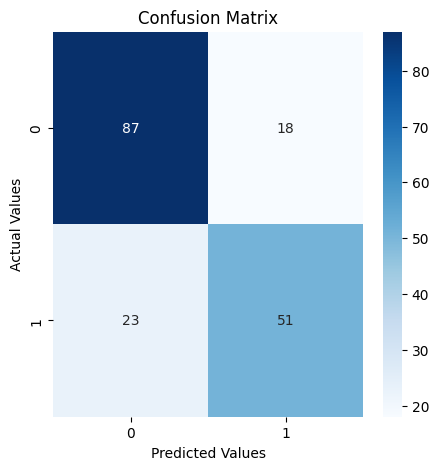

Precision: 0.7391304347826086, Recall: 0.6891891891891891


Test loss: 0.4756881594657898, Test accuracy: 0.7709497213363647



In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


def cross_train_model(model):
    optimizer = Adam(learning_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(
            X_train_fold,
            y_train_fold,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_fold, y_val_fold),
            callbacks=callbacks,
        )

        scores.append(model.evaluate(X_val_fold, y_val_fold))

    print("")

    for i, (_loss, acc) in enumerate( scores ):
        print(f"Fold: {i+1}, loss: {_loss}, accuracy: {acc}")

    print("")

    print_metrics(model, X_test, y_test)


# Модель 13
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

cross_train_model(model)

## Вывод

Модель правильно предсказала смерть для 87 человек, и не правильно для 23-х.

Модель правильно предсказала выживаемость для 51 человека, и не првильно для 18-ти.

#### Можно сравнить результаты обучения с кросс валидацией и без нее

До:
Loss:  0.42	 Accuracy:  0.80	 Precision:  0.80	 Recall:  0.70

После:
loss: 0.48,  accuracy: 0.78 Precision: 0.74, Recall: 0.69

* Стоит больше внимания уделять аналитике и feature engineering

* Модели с большим количеством слоев или нейронов не успевают обучиться на таком небольшом датасете как этот

* Регуляризация и Dropout в некоторых случаях могут только помешать обучению